<a href="https://colab.research.google.com/github/castroavila/projetos_dio/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  'tensorflow[and-cuda]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 65.7 MB/s eta 0:00:00


In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns


import pandas as pd

In [2]:
tf.__version__
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8889 - loss: 0.3600 - val_accuracy: 0.9854 - val_loss: 0.0455
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9849 - loss: 0.0499 - val_accuracy: 0.9899 - val_loss: 0.0325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9898 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0233 - val_accuracy: 0.9887 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9931 - loss: 0.0201 - val_accuracy: 0.9850 - val_loss: 0.0494


In [10]:
y_true=test_labels
#y_pred=model.predict_classes(test_images)
y_pred=np.argmax(model.predict(test_images), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

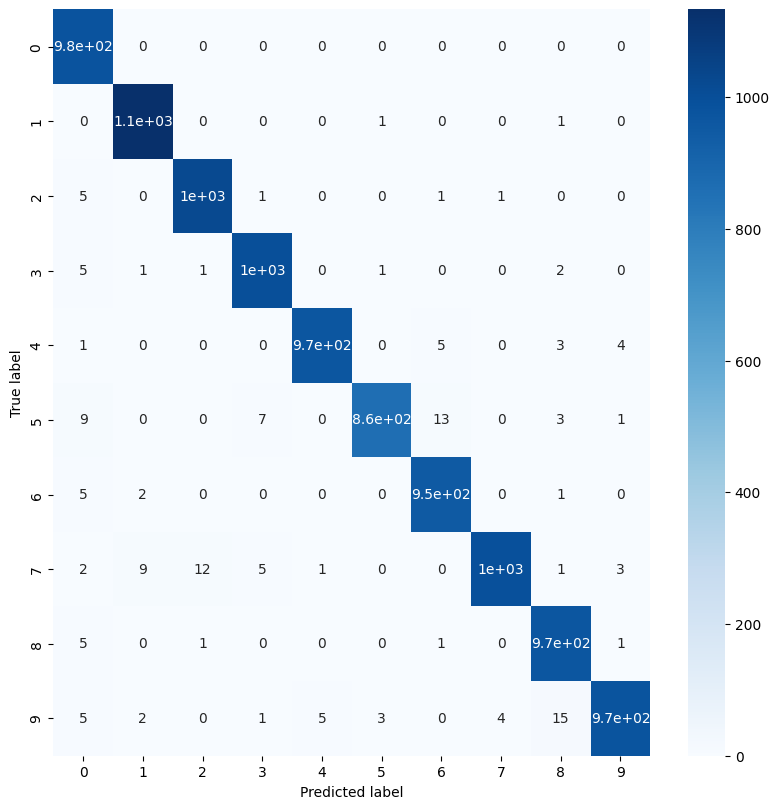

In [30]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
for classe in classes:
  print(f' {classe}: # {(y_true==classe).sum()}')

 0: # 980
 1: # 1135
 2: # 1032
 3: # 1010
 4: # 982
 5: # 892
 6: # 958
 7: # 1028
 8: # 974
 9: # 1009


In [42]:
con_mat[0]

array([980,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

# Implementação de métricas acessando os valores na matriz de confusão

In [51]:
total_samples = con_mat.sum()
for classe in classes:
  vp =  con_mat[classe][classe]
  fn = con_mat[classe, :].sum() - vp
  fp = con_mat[:, classe].sum() - vp
  vn = total_samples - (vp + fp + fn)
  sensibilidade = vp /(vp+fn)
  especificidade = vn/(fp+vn)
  acuracia = (vp+vn)/total_samples
  precisao = vp/(vp+fp)
  f_score = 2*(precisao*sensibilidade)/(precisao+sensibilidade)
  print(f'##########Classe: {classe}#############################')
  print(f'vp : {vp}')
  print(f'fn: {fn}')
  print(f'sensibilidade: {sensibilidade}')
  print(f'especificidade: {especificidade}')
  print(f'acuracia: {acuracia}')
  print(f'precisao: {precisao}')
  print(f'f_score: {f_score}')

##########Classe: 0#############################
vp : 980
fn: 0
sensibilidade: 1.0
especificidade: 0.9958980044345898
acuracia: 0.9963
precisao: 0.9636184857423795
f_score: 0.9814722083124687
##########Classe: 1#############################
vp : 1133
fn: 2
sensibilidade: 0.9982378854625551
especificidade: 0.9984207557811619
acuracia: 0.9984
precisao: 0.987794245858762
f_score: 0.992988606485539
##########Classe: 2#############################
vp : 1024
fn: 8
sensibilidade: 0.9922480620155039
especificidade: 0.9984388938447815
acuracia: 0.9978
precisao: 0.9865125240847784
f_score: 0.9893719806763284
##########Classe: 3#############################
vp : 1000
fn: 10
sensibilidade: 0.9900990099009901
especificidade: 0.9984427141268075
acuracia: 0.9976
precisao: 0.9861932938856016
f_score: 0.9881422924901185
##########Classe: 4#############################
vp : 969
fn: 13
sensibilidade: 0.9867617107942973
especificidade: 0.9993346640053227
acuracia: 0.9981
precisao: 0.9938461538461538
f_sco

In [16]:
# sensibility, accuracy, f-score, roc


In [17]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

NameError: name 'keras' is not defined

In [ ]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images